# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset

2022-01-19 19:52:52.502529: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/google/chrome:/opt/google/chrome/lib
2022-01-19 19:52:52.502543: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [10]:
dataset = get_dataset("/home/lavanya/Downloads/project1nd/processed/training_segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/lavanya/Downloads/project1nd/processed/training_segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/lavanya/Downloads/project1nd/processed/training_segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [11]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.patches import Rectangle
#draw groud truth bounding boxes on an image
def draw_detections(img, boxes, classes, i):
#     print("show image{}".format(i))
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img.astype(np.uint8))
    #color for each categroy,
    color_dict = {1: 'r', 2: 'b', 4:'g'}
    for box,box_class in zip(boxes, classes):
        y1, x1, y2, x2  = box
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor=color_dict[box_class], linewidth=2)
        ax.add_patch(rec)
    plt.title(f'Image {i}')
    plt.xlabel('width (pixel)', fontsize=18)
    plt.ylabel('height (pixel)', fontsize=16)
    plt.show()
    return

i = 1
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    global i
    plt.figure()
    img  = batch['image'].numpy()
    h, w, _c = img.shape 
    boxes = batch['groundtruth_boxes'].numpy()
    boxes[:,(0,2)] *= h
    boxes[:,(1,3)] *= w
    classes = batch['groundtruth_classes'].numpy()
    draw_detections(img.copy(), boxes, classes, i)
    i = i+ 1
    return


## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 432x288 with 0 Axes>

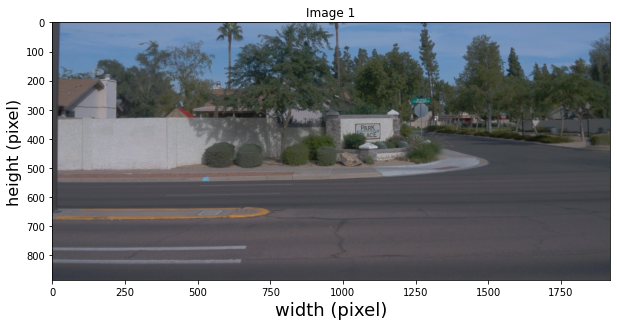

<Figure size 432x288 with 0 Axes>

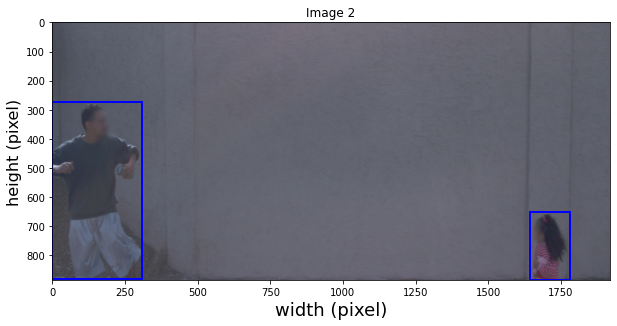

<Figure size 432x288 with 0 Axes>

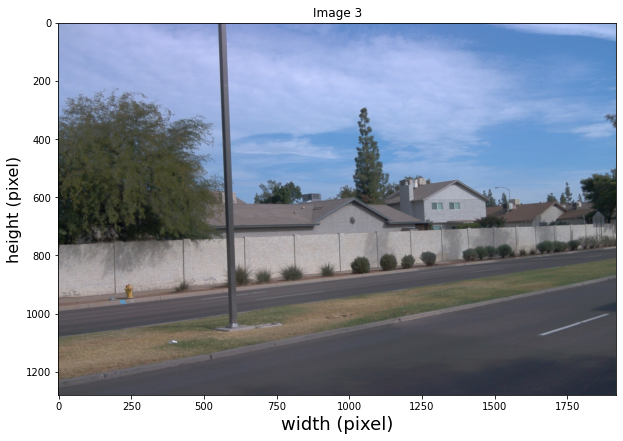

<Figure size 432x288 with 0 Axes>

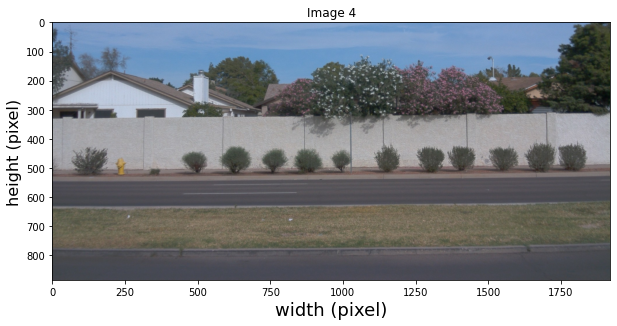

<Figure size 432x288 with 0 Axes>

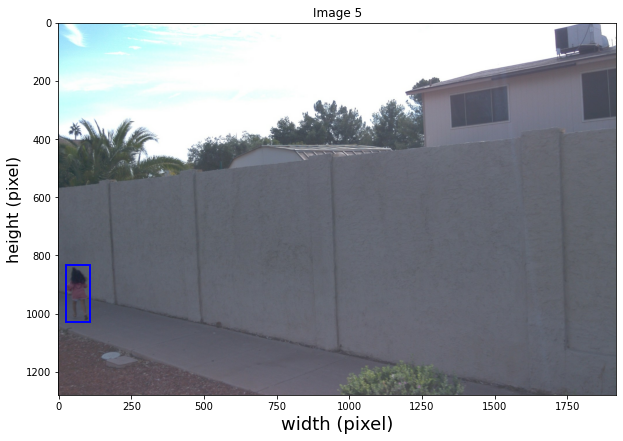

<Figure size 432x288 with 0 Axes>

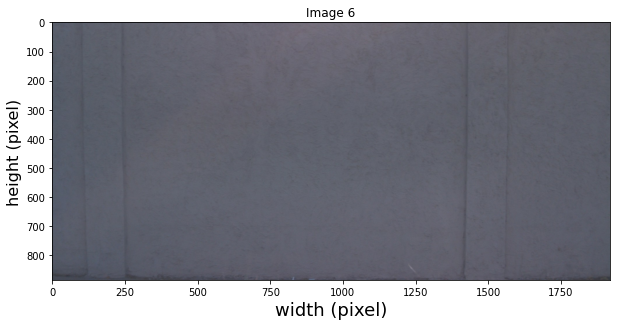

<Figure size 432x288 with 0 Axes>

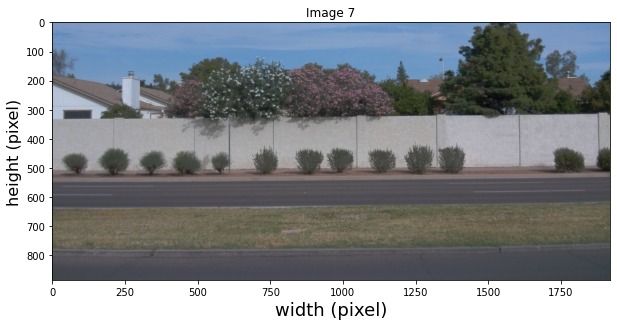

<Figure size 432x288 with 0 Axes>

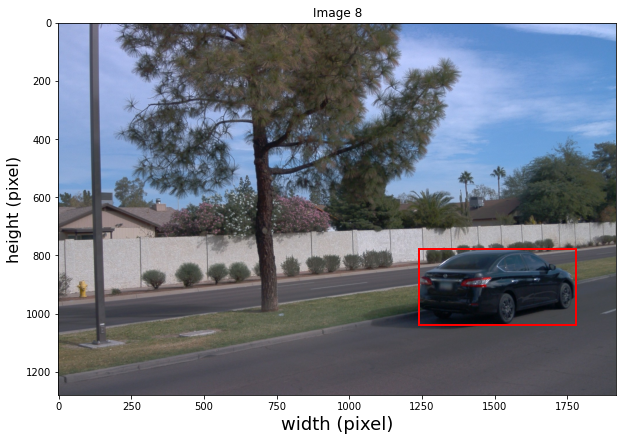

<Figure size 432x288 with 0 Axes>

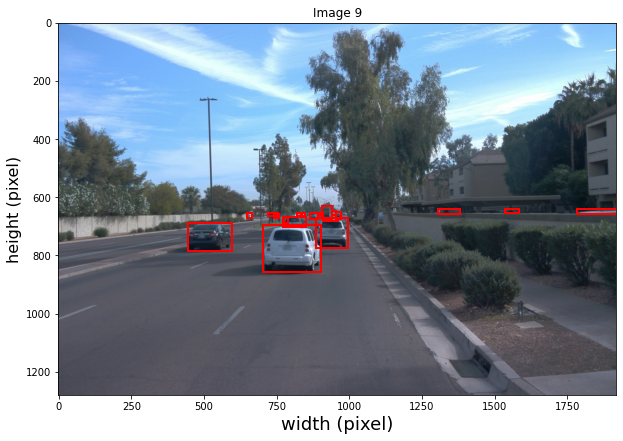

<Figure size 432x288 with 0 Axes>

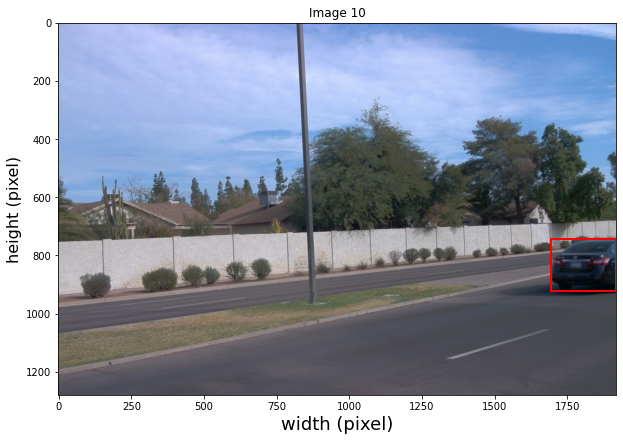

In [12]:
## STUDENT SOLUTION HERE
dataset = dataset.shuffle(100)
dataset = dataset.take(10)

for batch in dataset:
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...